In [159]:
import os
os.chdir('/Users/mc/Library/CloudStorage/OneDrive-TheUniversityofSydney(Students)/PyCharm/toliman-phd')

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rd
from alphacen import Psf


%matplotlib inline
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams["font.family"] = "monospace"
plt.rcParams["image.origin"] = 'lower'
plt.rcParams['figure.dpi'] = 120
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

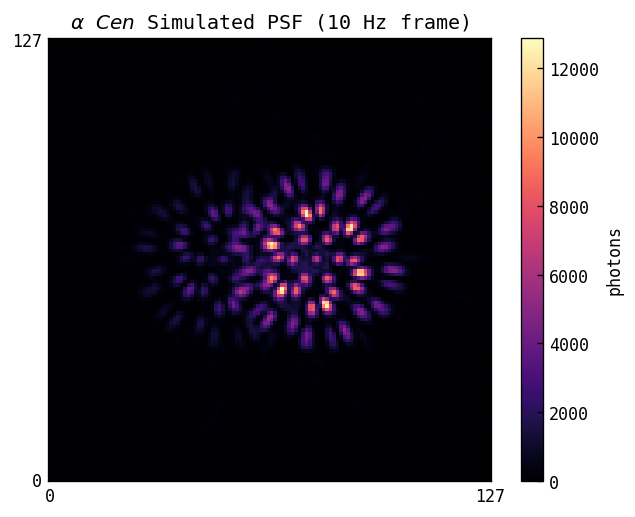

In [160]:
obj = Psf(seed=0)
obj.pa = 90
obj.sep = 10
obj.flux = 6.152e7 / 10 / 2  # AVERAGE flux of the two stars per frame

mask = obj.LoadMask('data/test_mask.npy')
ideal = obj.GetPSF(mask)
PSF = obj.AddNoise(ideal)

# plotting plot
fig, (ax1)= plt.subplots()
c = ax1.imshow(PSF, cmap='magma')
ax1.set(title=r'$\alpha$ $Cen$ Simulated PSF (10 Hz frame)',
        xticks=[0, PSF.shape[0] - 1],
        yticks=[0, PSF.shape[1] - 1],
        )
fig.colorbar(c, ax=ax1, label ='photons')
plt.show()

In [ ]:
def sample_circle(centre: tuple, r: float, theta: float):
    h, k = centre
    x = h + r * np.sin(theta)
    y = k + r * np.cos(theta)
    return x, y

3.479266961127505


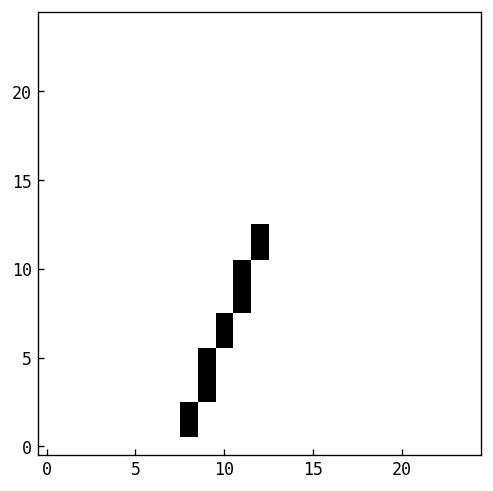

In [171]:
from PIL import Image, ImageDraw

im_size = 25
origin = (im_size // 2, im_size // 2)
radius = im_size // 2 - 1
theta = rd.uniform(0, 2*np.pi)
print(theta)

shape = [origin, sample_circle(origin, radius, theta)]

# creating new Image object
kernel_img = Image.new("1", (im_size, im_size))

# create line image
img = ImageDraw.Draw(kernel_img)
img.line(shape, fill ="white", width = 0)
kernel = np.asarray(kernel_img)

# plotting
plt.imshow(kernel, cmap='Greys')
plt.show()

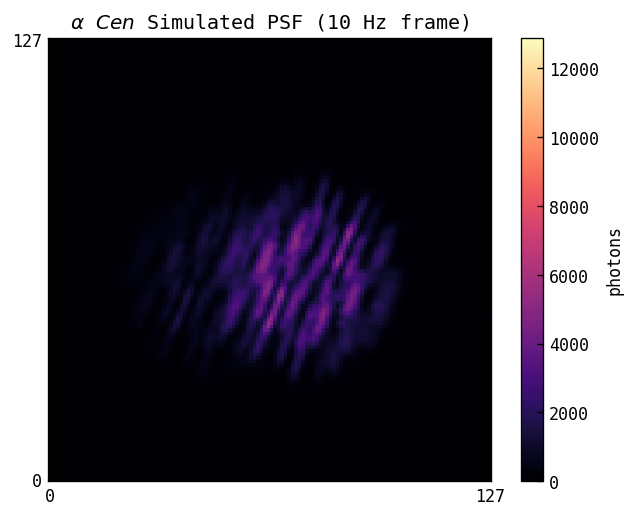

In [172]:
from scipy.signal import convolve2d
PSF_sum = np.sum(PSF)
jit_PSF = convolve2d(PSF, kernel, mode='same')
jit_PSF = jit_PSF / np.sum(jit_PSF) * PSF_sum

fig, ax1 = plt.subplots()
c = ax1.imshow(jit_PSF, cmap='magma', vmin=0, vmax=PSF.max())
ax1.set(title=r'$\alpha$ $Cen$ Simulated PSF (10 Hz frame)',
        xticks=[0, PSF.shape[0] - 1],
        yticks=[0, PSF.shape[1] - 1],
        )
fig.colorbar(c, ax=ax1, label ='photons')
plt.show()